# Projeto Final de Machine Learning - Amanda Keren Frois Cardoso
Matrícula: 202124410001

# Exercício 1 - Classificação

Neste exercício, vamos trabalhar com o conjunto de dados Wine (carregado abaixo). Você deve escrever o código para executar as seguintes tarefas:

<br>1- Normalizar o conjunto de dados. 
<br>2- Separar as observações e rótulos em dois conjuntos (treino e teste) de acordo com o método hold-out (75/25)
<br>3- Executar o PCA sobre todo o conjunto de dados e plotar um gráfico com duas dimensões que mostre os dois componentes principais e os pontos com cores diferentes de acordo com o rótulo. 
<br>4- Construir modelos de aprendizado (classificação) de acordo com os seguintes algoritmos: Árvore de Decisão, Random Forest e kNN. 
<br>5- Testar o desempenho dos três modelos, imprimindo na tela as principais métricas de desempenho e a matriz de confusão. 

<br> Após executar os códigos, responda: qual modelo teve o melhor desempenho?

In [254]:
import pandas as pd
import numpy as np
from sklearn import datasets 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


wine_data, wine_target = datasets.load_wine(return_X_y=True, as_frame=True)

wine_target = pd.DataFrame({'classes':wine_target.values}).astype('category')

#Visualizando o dataframe 
wine_data.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
#Visualizando o dataframe target

wine_target.head()

,classes
0,0
1,0
2,0
3,0
4,0


# 1 - NORMALIZANDO OS DADOS:

*   Usando StandardScaler








In [121]:
#Normalizando os dados usando o método StandardScaler()

from sklearn.preprocessing import StandardScaler

wine_std_normalization=StandardScaler().fit_transform(wine_data)

pd.DataFrame(wine_std_normalization).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# 2 - SEPARANDO OS DADOS EM CONJUNTO DE TREINO E DE TESTE COM O MÉTODO HOLD-OUT

In [103]:
# Usando o método hold-out para separar a amostra de dados entre treino e teste

# embaralhando as amostras (random)
np.random.seed(15)

#retorna uma faixa de valores permutados
indices = np.random.permutation(len(wine_data))

corte = round(len(wine_data)*0.75)

#iloc seleciona a posição do dataframe com base no inteiro passado como parâmetro
amostras_treino = wine_data.iloc[indices[:corte]]
rotulos_treino = wine_target['classes'].iloc[indices[:corte]].cat.codes

amostras_teste = wine_data.drop(amostras_treino.index)
rotulos_teste = wine_target['classes'].drop(rotulos_treino.index).cat.codes


In [98]:
#Visualizando o tamanho das amostras
print(rotulos_treino.count())
print(rotulos_teste.count())

134
44


# 3 - EXECUTANDO O PCA:

*   Realizando o PCA sobre todos os dados
*   Plotar gráfico com duas dimensões (com os dois componentes principais) e os pontos com cores diferentes de acordo com o rótulo.

In [125]:
#PCA SOBRE OS DADOS DA WINE_DATA

pca = PCA(n_components=13)

principal_components = pca.fit_transform(wine_std_normalization)
principal_df = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13'])
final_df = pd.concat([principal_df, wine_target[['classes']]], axis = 1)
final_df.head()

# principal_rbt_components = pca.fit_transform(wine_rbt_normalization)
# principal_rbt_Df = pd.DataFrame(data = principal_rbt_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13'])
# final_rbt_Df = pd.concat([principalDf, wine_target[['classes']]], axis = 1)
# final_rbt_Df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,classes
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,0
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,0
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,0
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,0
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,0


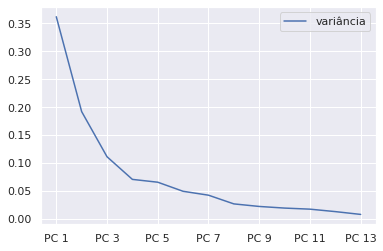

In [126]:
PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, PC10, PC11, PC12, PC13 = pca.explained_variance_ratio_

pd.DataFrame({
   'variância': [PC1, PC2, PC3, PC4, PC5, PC6, PC7, PC8, PC9, PC10, PC11, PC12, PC13]
   }, index=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13']).plot.line()

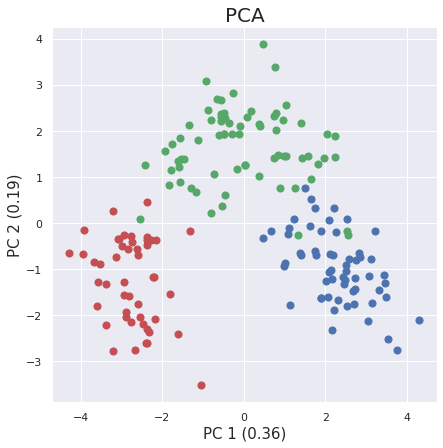

In [129]:
#GRÁFICO COM 2 PRINCIPAIS COMPONENTES E AS TRÊS CLASSES

fig = plt.figure(figsize = (40,40))

ax = fig.add_subplot(5,5,1) 
ax.set_xlabel('PC 1 ('+str(round(PC1,2))+ ')', fontsize = 15)
ax.set_ylabel('PC 2 ('+str(round(PC2,2))+ ')', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['b', 'g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['classes'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC 1']
               , final_df.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
                

# 4- CONSTRUINDO MODELOS DE APRENDIZADO (CLASSIFICAÇÃO):
*   kNN
*   Árvore de decisão
*   Random Forest

Apresentando:
*   Métricas de desempenho
*   Matriz de confusão


In [147]:
#MODELO DE APRENDIZADO KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(amostras_treino, rotulos_treino)
KNeighborsClassifier()

resultado_knn = knn.predict(amostras_teste)

print(resultado_knn)

[0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1
 1 2 1 0 1 2 1]


In [177]:
# MODELO DE APRENDIZADO ÁRVORE DE DECISÃO

tree = DecisionTreeClassifier(random_state=1234)
tree_model = clf.fit(amostras_treino, rotulos_treino)

#criando representação da árvore em texto
text_representation = tree.export_text(clf)
print(text_representation)

#testando o modelo nos dados de teste
resultado_tree = clf.predict(amostras_teste)
resultado_tree

|--- feature_9 <= 3.82
|   |--- feature_2 <= 3.07
|   |   |--- feature_12 <= 1002.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  1002.50
|   |   |   |--- class: 0
|   |--- feature_2 >  3.07
|   |   |--- class: 0
|--- feature_9 >  3.82
|   |--- feature_6 <= 1.79
|   |   |--- feature_2 <= 2.06
|   |   |   |--- class: 1
|   |   |--- feature_2 >  2.06
|   |   |   |--- class: 2
|   |--- feature_6 >  1.79
|   |   |--- feature_12 <= 742.00
|   |   |   |--- feature_1 <= 3.01
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  3.01
|   |   |   |   |--- class: 0
|   |   |--- feature_12 >  742.00
|   |   |   |--- class: 0



array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int8)

In [186]:
# MODELO DE APRENDIZADO RANDOM FOREST

rf = RandomForestClassifier().fit(amostras_treino, rotulos_treino)
resultado_rf = rf.predict(amostras_teste)

print(resultado_rf)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2]


In [255]:
#COMPARAÇÃO DE MÉTRICAS DE DESEMPENHO 

print("MÉTRICAS DE DESEMPENHO\n\n")

print("Accuracy Score - kNN\t","Accuracy Score - ÁRVORE DE DECISÃO\t","Accuracy Score - RANDOM FOREST\n",
      accuracy_score(rotulos_teste, resultado_knn),"\t\t",accuracy_score(rotulos_teste, resultado_tree),"\t\t\t",accuracy_score(rotulos_teste, resultado_rf),"\n\n")


print("Classification Report - kNN\n",classification_report(rotulos_teste, resultado_knn),"\n")

print("Classification Report - ÁRVORE DE DECISÃO\n",classification_report(rotulos_teste, resultado_tree),"\n")

print("Classification Report - RANDOM FOREST\n",classification_report(rotulos_teste, resultado_rf),"\n")


print(confusion_matrix(rotulos_teste, resultado_rf))

MÉTRICAS DE DESEMPENHO


Accuracy Score - kNN	 Accuracy Score - ÁRVORE DE DECISÃO	 Accuracy Score - RANDOM FOREST
 0.9318181818181818 		 0.9318181818181818 			 0.9772727272727273 


Classification Report - kNN
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.88      0.93      0.90        15
           2       0.92      1.00      0.96        11

    accuracy                           0.93        44
   macro avg       0.93      0.94      0.93        44
weighted avg       0.94      0.93      0.93        44
 

Classification Report - ÁRVORE DE DECISÃO
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.88      0.93      0.90        15
           2       0.92      1.00      0.96        11

    accuracy                           0.93        44
   macro avg       0.93      0.94      0.93        44
weighted avg       0.94      0.93    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

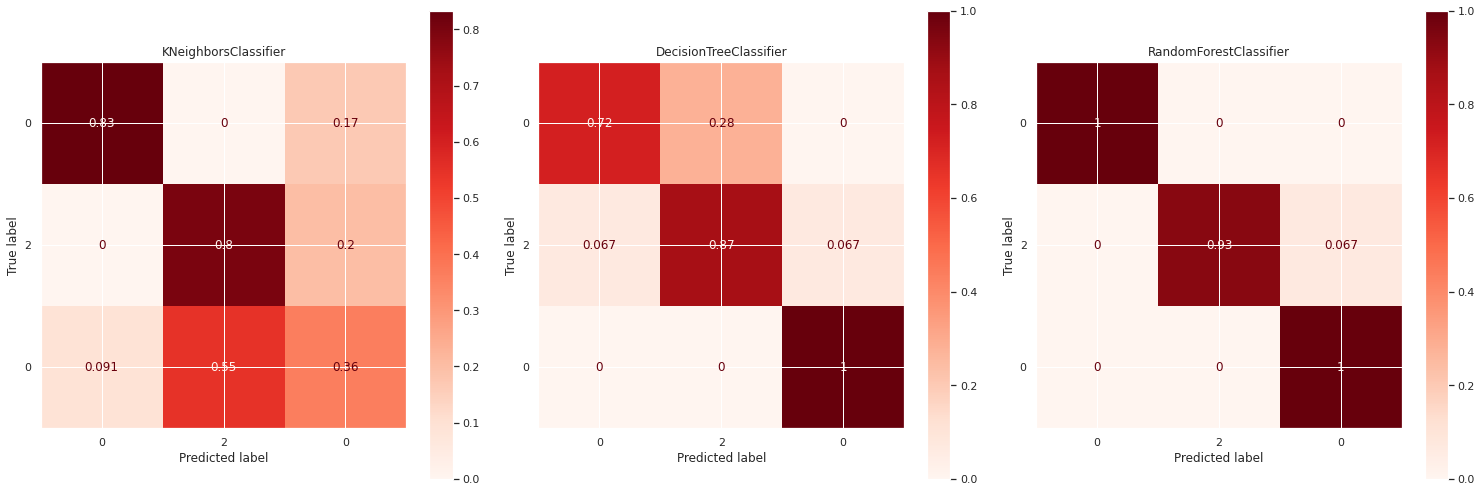

In [253]:
#CONFUSION MATRIX DOS CLASSIFICADORES

classifiers = [KNeighborsClassifier(),
               DecisionTreeClassifier(),
               RandomForestClassifier()]

for cls in classifiers:
    cls.fit(amostras_treino, rotulos_treino)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21,7))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          amostras_teste, 
                          rotulos_teste, 
                          ax=ax, 
                          display_labels=wine_target['classes'].iloc[~indices[:corte]],
                          cmap=plt.cm.Reds,
                          normalize="true")
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()



# Resultado:

O modelo com melhor desempenho foi o RandomForest, que nas classificações realizadas classificou corretamente, na amostra teste (44), 43 dos dados, praticamente 100% de acurácia, enquanto os doutros dois classificadores se comportaram bem parecidos, obtendo 93% de acurácia. Podemos ver na matrix de confusão que o RF classificou erroneamente apenas 1 valor, considerando da classe 3 uma amostra da classe 2. 

A atividade de classificação resultou em altos valores de acurácia e precisão, o que pode ser resultado de um pequeno volume dos dados, já que tem menos de 200 linhas. 




---



---



---




# Exercício 2 - Regressão

Neste exercício, vamos trabalhar com o conjunto de dados Diabetes (carregado abaixo). Você deve escrever o código para executar as seguintes tarefas:

<br>1- Separar as observações e rótulos em dois conjuntos (treino e teste) de acordo com o método hold-out (75/25)
<br>2- Construir modelos de aprendizado (regressão) de acordo com os seguintes algoritmos: Random Forest, SVM (kernels linear, RBF e polinomial). 
<br>3- Testar o desempenho dos quatro modelos, imprimindo na tela um gráfico que mostre as predições e os dados reais. Imprimir também na tela o RMSE alcançado por cada um dos 4 modelos. 

In [5]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import svm
import matplotlib.pyplot as plt

diabetes_data, diabetes_target = datasets.load_diabetes(return_X_y=True, as_frame=True)

diabetes_target = pd.DataFrame({'values':diabetes_target.values})

diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


# 1 - SEPARANDO OS DADOS EM CONJUNTOS DE TREINO E TESTE
Método hold-out 75:25

In [6]:
# Separando a amostra em treino e test com uso do método hold-out train_test_split
diabetes_all = pd.concat([diabetes_data, diabetes_target['values']], axis=1)
diabetes_train, diabetes_test= train_test_split(diabetes_all,test_size=0.25)

amostra_treino=diabetes_train.drop("values", axis=1)
rotulo_treino=np.array(diabetes_train['values'])

amostra_teste=diabetes_test.drop("values", axis=1)
rotulo_teste=np.array(diabetes_test['values'])

# 2 - CONSTRUINDO MODELOS DE REGRESSÃO: 
*   Random Forest
*   SVM Linear
*   SVM RBF
*   SVM Polinomial


In [31]:
#Random Forest
rf = RandomForestRegressor().fit(amostra_treino.select_dtypes([np.number]),rotulo_treino)
resultado_rf = rf.predict(amostra_teste.select_dtypes([np.number])) # Prevendo o conjunto de teste
error_poly = np.mean((resultado_poly-rotulo_teste)**2)**(1/2) #RMSE

#SVM Linear
svr_lin = svm.SVR(kernel='linear').fit(amostra_treino.select_dtypes([np.number]), rotulo_treino)
resultado_linear = svr_lin.predict(amostra_teste.select_dtypes([np.number]))
error_linear = np.mean((resultado_linear-rotulo_teste)**2)**(1/2) #RMSE

#SVM RBF
svr_rbf = svm.SVR(kernel='rbf').fit(amostra_treino.select_dtypes([np.number]), rotulo_treino)
resultado_rbf = svr_rbf.predict(amostra_teste.select_dtypes([np.number])) # Prevendo o conjunto de teste
error_rbf = np.mean((resultado_rbf-rotulo_teste)**2)**(1/2) #RMSE

#SVM Polinomial
svr_poly = svm.SVR(kernel='poly', degree=10).fit(amostra_treino.select_dtypes([np.number]), rotulo_treino) #degree=5
resultado_poly = svr_poly.predict(amostra_teste.select_dtypes([np.number])) # Prevendo o conjunto de teste
error_poly = np.mean((resultado_poly-rotulo_teste)**2)**(1/2) #RMSE


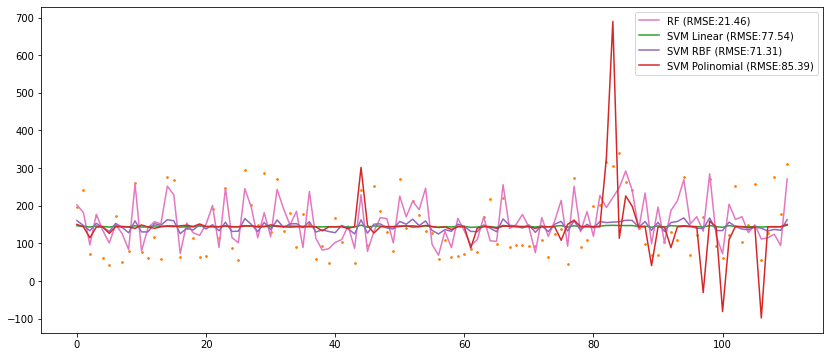

In [30]:
#Gráfico 
plt.figure(figsize=(14,6))
plt.plot(resultado_rf, label="RF (RMSE:"+str(round(error_rf,2))+")", color="C6")
plt.plot(resultado_linear, label="SVM Linear (RMSE:"+str(round(error_linear,2))+")", color="C2")
plt.plot(resultado_rbf, label="SVM RBF (RMSE:"+str(round(error_rbf,2))+")", color="C4")
plt.plot(resultado_poly, label="SVM Polinomial (RMSE:"+str(round(error_poly,2))+")", color="C3")
plt.scatter(range(0,amostra_teste.index.size), rotulo_teste, s=3, color="C1")
plt.legend()


# Resultado:

O melohr modelo de regressão entre os apresentados é o Random Forest, cujo RMSE é de 21,46, em comparação com os outros de SVM que ultrapassam os 70.





---



---



---




# Exercício 3 - Clusterização

Neste exercício, vamos trabalhar com um conjunto de dados gerado sinteticamente (abaixo). Você deve escrever o código para executar as seguintes tarefas:

<br>1- Fazer o gráfico de K distance para descobrir um valor de epsilon adequado a ser utilizado no DBSCAN. Qual valor você escolheu?
<br>2- Executar o DBSCAN com valores padrão para os parâmetros. 
<br>3- Apresentar gráfico em duas dimensões que mostre os pontos no espaço de busca. Cada ponto deve ser colorido de acordo com o cluster ao qual ele foi associado. A cor também pode indicar que ele é um outlier. 
<br>4- Executar o DBSCAN com o valor de epsilon escolhido no passo 1.
<br>5- Apresentar gráfico em duas dimensões que mostre os pontos no espaço de busca. Cada ponto deve ser colorido de acordo com o cluster ao qual ele foi associado. A cor também pode indicar que ele é um outlier. 

<br>Qual é a diferença entre os resultados obtidos com o epsilon padrão e o epsilon escolhido por você? Pensando no funcionamento do algoritmo, porque temos esta diferença?

In [61]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (7,7)]
num_classes = len(cluster_centers)

# Generate data
X, Y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)

pd.DataFrame(X).head()

,0,1
0,3.709817,3.274596
1,2.564165,2.425842
2,5.555489,7.465769
3,7.686862,7.137155
4,2.628173,3.595054


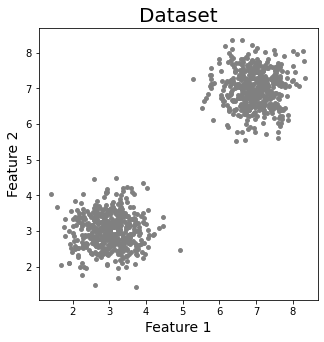

In [49]:
#Apresentando estes dados em um gráfico
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# 1 - FAZENDO O GRÁFICO DE K-DISTANCE PARA DESCOBRIR O Y

[[0.         0.01543594]
 [0.         0.24455962]
 [0.         0.02334333]
 ...
 [0.         0.01573745]
 [0.         0.04206152]
 [0.         0.05178937]]


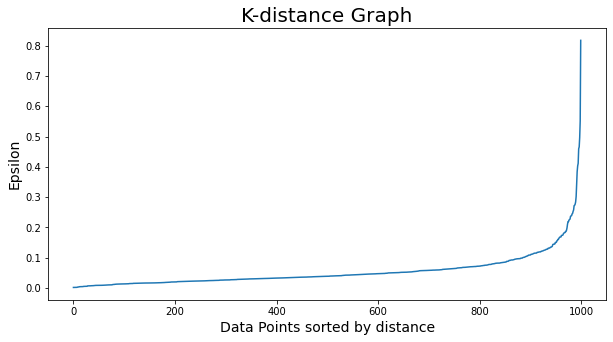

In [54]:
#K DISTANCE GRAPH
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

print(distances)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [62]:
dbscan = DBSCAN(eps=0.1, min_samples=6)
y_dbscan = dbscan.fit_predict(X)

print(pd.DataFrame(y_dbscan),value_counts())

#Apresentando clusters resultantes do DBSCAN
plt.figure(figsize=(5,5))
scatter=plt.scatter(X[:,0],X[:,1],c=y_dbscan,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.legend(*scatter.legend_elements(),loc="lower left", title="Classe")
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

NameError: ignored

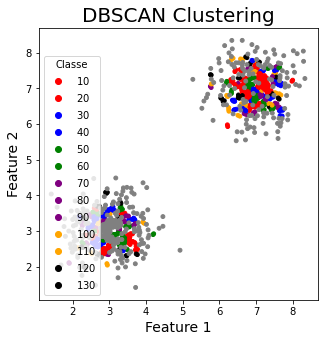

In [44]:
colors=['red','blue','green','purple','orange','black']
dbscan = DBSCAN(eps=0.06, min_samples=2)
y_dbscan = dbscan.fit_predict(X)

ydb = y_dbscan.copy()
outdb = y_dbscan.copy()


ydb=np.where(ydb <= 0, np.nan, ydb)
outdb=np.where(outdb > 0, np.nan, outdb)

plt.figure(figsize=(5,5))
scatter=plt.scatter(X[:,0],X[:,1],c=ydb,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.scatter(X[:,0],X[:,1],c=outdb,cmap=matplotlib.colors.ListedColormap('grey'),s=15)
plt.legend(*scatter.legend_elements(),loc="lower left", title="Classe")
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()